In [7]:
#I am choosing to present to a non-technical audience, and the problem I have chosen is: Out of the cases where an 
#animal bite was tested for Rabies, which animal was responsible for the bite and which animal bite is most likely to test positive for Rabies?

In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [112]:
bites = pd.read_csv(r'C:\Users\maxsu\Health_AnimalBites.csv')

In [113]:
#Checking out the column names
bites.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [114]:
# For my question the most important columns would be 'SpeciesIDDesc' and 'ResultsIDDesc'


In [115]:
bites = bites.drop(columns = ['bite_date', 'BreedIDDesc', 'victim_zip', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date'])

In [116]:
bites.head()

,SpeciesIDDesc,ResultsIDDesc
0,DOG,UNKNOWN
1,DOG,UNKNOWN
2,DOG,UNKNOWN
3,DOG,UNKNOWN
4,DOG,UNKNOWN


In [117]:
#For simplicity we only care about the values where the result of the Rabies test is known
bites = bites[bites['ResultsIDDesc'].str.contains('UNKNOWN')==False]

In [118]:
bites.head()

,SpeciesIDDesc,ResultsIDDesc
1115,DOG,NEGATIVE
1153,DOG,NEGATIVE
1208,DOG,NEGATIVE
1217,CAT,NEGATIVE
1273,CAT,NEGATIVE


In [119]:
bites['ResultsIDDesc'].value_counts()

ResultsIDDesc
NEGATIVE    299
POSITIVE      4
Name: count, dtype: int64

In [120]:
bites['SpeciesIDDesc'].value_counts()

SpeciesIDDesc
BAT        163
CAT         64
DOG         59
RACCOON      9
OTHER        5
Name: count, dtype: int64

In [121]:
positive = bites[bites['ResultsIDDesc']== 'POSITIVE']

In [123]:
positive.value_counts()

SpeciesIDDesc  ResultsIDDesc
BAT            POSITIVE         3
DOG            POSITIVE         1
Name: count, dtype: int64

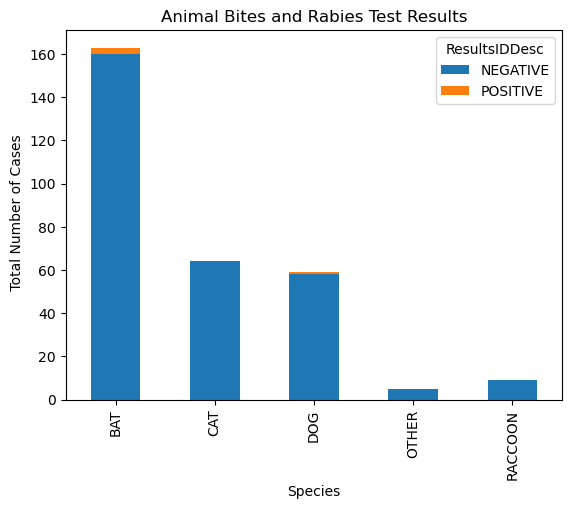

In [126]:
#Now we will show the total number of bat bites vs. positive results
grouped_data = bites.groupby(['SpeciesIDDesc', 'ResultsIDDesc']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True)
# Adding labels and title
plt.xlabel('Species')
plt.ylabel(' Total Number of Cases')
plt.title('Animal Bites and Rabies Test Results')

# Show the plot
plt.show()